# Comparison of X-ray and tSZ cluster angular positions

In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
import cmbo

from plot_cluster import *
from score_individual_objects import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
data_MCXC = cmbo.io.load_mcxc_catalogue(cfg['paths']['MCXC_catalogue'])
data_eRASS = cmbo.io.load_erass_catalogue(cfg['paths']['eRASS_catalogue'])
data_tSZ = cmbo.io.read_Planck_cluster_catalog(cfg['paths']['Planck_tSZ_catalogue'])

obs_clusters = cmbo.io.load_observed_clusters(cfg['paths']['observed_clusters'], skip_names=["Abell 548", "Abell 1644"])

Removing 94 MCXC entries with non-positive mass uncertainties.
Removing 1805 eRASS entries with M500 = -1.
Removing 54 eRASS entries with M500 > 1.00e+15 Msol.
Skipping observed cluster 'Abell 1644'.
Skipping observed cluster 'Abell 548'.


In [17]:
cmbo.utils.crossmatch_planck_catalog(obs_clusters, data_tSZ, max_sep_arcmin=120, max_delta_cz=1000)
cmbo.utils.crossmatch_mcxc(obs_clusters, data_MCXC, max_sep_arcmin=20, max_delta_cz=1000.)
cmbo.utils.crossmatch_erass(obs_clusters, data_eRASS, max_sep_arcmin=20, max_delta_cz=500.)


No Planck match for 3 observed clusters: ['Hydra (A1060)', 'Virgo Cluster', 'Perseus (A426)']
No MCXC match for 1 observed clusters: ['Virgo Cluster']
No eRASS match for 9 observed clusters: ['Abell 119', 'Hydra (A1060)', 'Hercules (A2199)', 'Hercules (A2147)', 'Hercules (A2063)', 'Hercules (A2151)', 'Coma (A1656)', 'Virgo Cluster', 'Perseus (A426)']


In [18]:
for i in range(len(obs_clusters)):
    obs = obs_clusters[i]
    print(f"{obs.name:20s}  | {i}")

Abell 119             | 0
Abell 1736            | 1
Abell 496             | 2
Hydra (A1060)         | 3
Centaurus (A3526)     | 4
Hercules (A2199)      | 5
Hercules (A2147)      | 6
Hercules (A2063)      | 7
Hercules (A2151)      | 8
Leo (A1367)           | 9
Coma (A1656)          | 10
Norma (A3627)         | 11
Virgo Cluster         | 12
Shapley (A3571)       | 13
Shapley (A3558)       | 14
Shapley (A3562)       | 15
Perseus (A426)        | 16


In [19]:
M500_tSZ = extract_match_field(obs_clusters, "planck_match", "M500")
eM500_tSZ = extract_match_field(obs_clusters, "planck_match", "M500_err")

M500_eRASS = extract_match_field(obs_clusters, "erass_match", "M500")
eM500_eRASS = extract_match_field(obs_clusters, "erass_match", "M500_err")

M500_MCXC = extract_match_field(obs_clusters, "mcxc_match", "M500")
eM500_MCXC = extract_match_field(obs_clusters, "mcxc_match", "M500_err")

names = [obs.name for obs in obs_clusters]

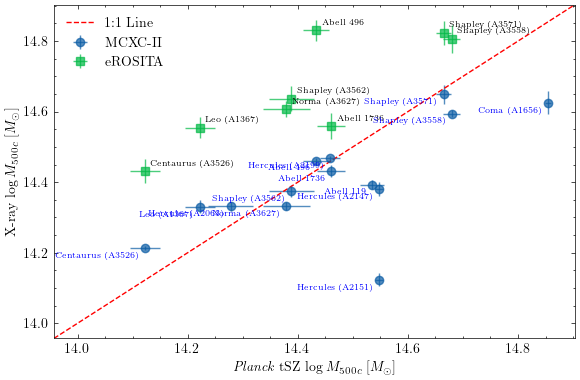

In [20]:
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6, 4))

    # MCXC–II vs tSZ
    x_m = np.log10(M500_tSZ)
    y_m = np.log10(M500_MCXC)
    ax.errorbar(
        x_m,
        y_m,
        xerr=eM500_tSZ / (M500_tSZ * np.log(10)),
        yerr=eM500_MCXC / (M500_MCXC * np.log(10)),
        fmt='o',
        alpha=0.7,
        label="MCXC-II"
    )

    # eROSITA vs tSZ
    x_e = np.log10(M500_tSZ)
    y_e = np.log10(M500_eRASS)
    ax.errorbar(
        x_e,
        y_e,
        xerr=eM500_tSZ / (M500_tSZ * np.log(10)),
        yerr=eM500_eRASS / (M500_eRASS * np.log(10)),
        fmt='s',
        alpha=0.7,
        label="eROSITA"
    )

    # Labels for eROSITA (black)
    for x, y, name in zip(x_e, y_e, names):
        if np.isfinite(x) and np.isfinite(y):
            ax.text(
                x + 0.01,
                y + 0.01,
                name,
                fontsize=6,
                ha="left",
                va="bottom",
                color="black"
            )

    # Labels for MCXC (blue)
    for x, y, name in zip(x_m, y_m, names):
        if np.isfinite(x) and np.isfinite(y):
            ax.text(
                x - 0.01,
                y - 0.01,
                name,
                fontsize=6,
                ha="right",
                va="top",
                color="blue"
            )

    ax.axline([14, 14], slope=1, color='red', linestyle='--', label="1:1 Line")

    ax.set_xlabel(r"\textit{Planck} tSZ $\log M_{500c} ~ [M_\odot]$")
    ax.set_ylabel(r"X-ray $\log M_{500c} ~ [M_\odot]$")
    ax.legend()

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/comparison_mass_matched.png", dpi=300)
    plt.show()

In [21]:
sep_mcxc = match_angular_separation(obs_clusters, "planck_match", "mcxc_match")
sep_erass = match_angular_separation(obs_clusters, "planck_match", "erass_match")

for name, sep_mc, sep_er in zip(names, sep_mcxc, sep_erass):
    print(f"{name:20s}  MCXC sep = {sep_mc:.2f} arcmin   |   eRASS sep = {sep_er:.2f} arcmin")


Abell 119             MCXC sep = 4.03 arcmin   |   eRASS sep = nan arcmin
Abell 1736            MCXC sep = 3.12 arcmin   |   eRASS sep = 2.32 arcmin
Abell 496             MCXC sep = 2.28 arcmin   |   eRASS sep = 2.20 arcmin
Hydra (A1060)         MCXC sep = nan arcmin   |   eRASS sep = nan arcmin
Centaurus (A3526)     MCXC sep = 2.67 arcmin   |   eRASS sep = 2.78 arcmin
Hercules (A2199)      MCXC sep = 0.70 arcmin   |   eRASS sep = nan arcmin
Hercules (A2147)      MCXC sep = 4.31 arcmin   |   eRASS sep = nan arcmin
Hercules (A2063)      MCXC sep = 0.42 arcmin   |   eRASS sep = nan arcmin
Hercules (A2151)      MCXC sep = 103.16 arcmin   |   eRASS sep = nan arcmin
Leo (A1367)           MCXC sep = 8.60 arcmin   |   eRASS sep = 4.89 arcmin
Coma (A1656)          MCXC sep = 1.30 arcmin   |   eRASS sep = nan arcmin
Norma (A3627)         MCXC sep = 6.36 arcmin   |   eRASS sep = 5.69 arcmin
Virgo Cluster         MCXC sep = nan arcmin   |   eRASS sep = nan arcmin
Shapley (A3571)       MCXC sep = 

In [24]:
associations_manti, matches_manti, boxsize_manti = load_associations_and_matches("manticore", cfg, obs_clusters)

Loaded 50 simulation realisations.
Identified 355 halo associations.
Using 17 observed clusters.


100%|██████████| 355/355 [00:01<00:00, 229.38it/s]

Cluster 15 (Shapley (A3562)) now orphaned (best remaining p=1.711e-01)
Cluster 8 (Hercules (A2151)) now orphaned (best remaining p=2.509e-01)
Halo signal datasets were not found in the run_suite output; p-values only.


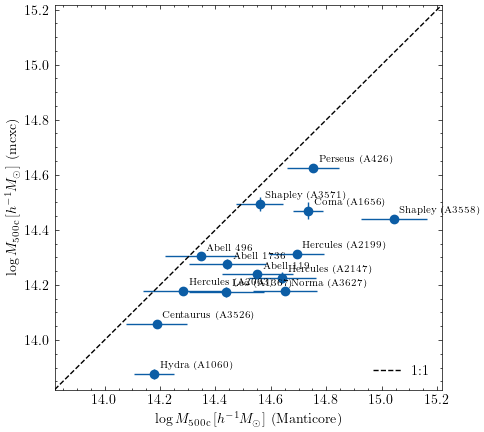

In [30]:
fig, ax = plot_match_mass_comparison(
    matches_manti, obs_clusters,
    match_attr="mcxc_match")

display(fig)